<h2 style="color: #75aadb;">00 | Libraries</h2>

In [12]:
# 📚 Basic libraries
import pandas as pd

# File system libraries
import os
import sys

# 🤖 Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Add the root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Project libraries
import utils.viz as viz

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #75aadb;">01 | Data Extraction</h2>

In [4]:
data = pd.read_csv('../datasets/processed_dataset.csv')
df = data.copy()
df.head(10) # Explore data

,title,authors,categories,all_summaries,all_texts,avg_score,all_texts_processed,sentiment_score,genre_Academic,genre_Children's/Young Adult,genre_Fiction,genre_Non-Fiction,genre_Poetry/Drama,genre_Unknown
0,Its Only Art If Its Well Hung!,['Julie Strain'],['Comics & Graphic Novels'],Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,4.00,nice collection julie strain image,0.3818,0,0,0,0,0,1
1,Dr. Seuss: American Icon,['Philip Nel'],['Biography & Autobiography'],Really Enjoyed It Essential for every personal...,I don't care much for Dr. Seuss but after read...,4.56,enjoy essential personal public library phlip ...,0.9806,1,0,0,0,0,0
2,Wonderful Worship in Smaller Churches,['David R. Ray'],['Religion'],Outstanding Resource for Small Church Pastors ...,"I just finished the book, &quot;Wonderful Wors...",5.00,outstanding resource small church pastor small...,0.9022,0,0,0,0,0,1
3,Whispers of the Wicked Saints,['Veronica Haddon'],['Fiction'],not good Here is my opinion Buyer beware Fall ...,I bought this book because I read some glowing...,3.72,good opinion buyer beware fall knee bravo vero...,0.9877,0,0,1,0,0,0
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],NaN,interplay of traditions across Caribbean,from publisher:Addresses the interplay of dive...,5.00,interplay tradition caribbean,0.0000,0,0,0,0,0,1
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],['Religion'],Ecclesiological Milestone Early Christian deve...,With the publication of Everett Ferguson's boo...,4.50,ecclesiological milestone early christian deve...,0.5719,0,0,0,0,0,1
6,The Overbury affair (Avon),['Miriam Allen De Ford'],NaN,Overbury,Full of intrigue and a good overview of the co...,3.00,overbury,0.0000,0,0,0,0,0,1
7,A Walk in the Woods: a Play in Two Acts,['Lee Blessing'],NaN,meaty and fast Surprisingly delightful A walk ...,"This play was excellent. It's very smart, inte...",4.67,meaty fast surprisingly delightful walk wood,0.7184,0,0,0,0,0,1
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],['Biography & Autobiography'],Review from the Publisher A miracle on every p...,Tells the wonderful story of how St. Hyacinth ...,4.50,review publisher miracle page,0.5859,0,0,0,0,0,1
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],['Social Science'],Wardell's book is a pure delight. A fascinatin...,Steven Wardell's book is a pure delight and I'...,4.33,wardell book pure delight fascinating insight ...,0.8126,0,0,0,1,0,0


<h2 style="color: #75aadb;">06 | Clustering</h2>

### Standardization

In [5]:
# Dataframe without the title
X = df[['avg_score','sentiment_score', 'genre_Academic', "genre_Children's/Young Adult", 'genre_Fiction', 'genre_Non-Fiction', 'genre_Poetry/Drama', 'genre_Unknown']]

In [6]:
X

,avg_score,sentiment_score,genre_Academic,genre_Children's/Young Adult,genre_Fiction,genre_Non-Fiction,genre_Poetry/Drama,genre_Unknown
0,4.00,0.3818,0,0,0,0,0,1
1,4.56,0.9806,1,0,0,0,0,0
2,5.00,0.9022,0,0,0,0,0,1
3,3.72,0.9877,0,0,1,0,0,0
4,5.00,0.0000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
204319,4.69,0.9914,0,0,0,1,0,0
204320,5.00,0.9260,0,0,0,0,0,1
204321,4.67,0.8834,0,0,1,0,0,0
204322,2.50,-0.5423,0,0,0,0,0,1


In [7]:
# First Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-means Clustering

In [9]:
max_k = 10
inertia = []
silhouette_sc = []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_sc.append(sil_score)
    inertia.append(kmeans.inertia_)

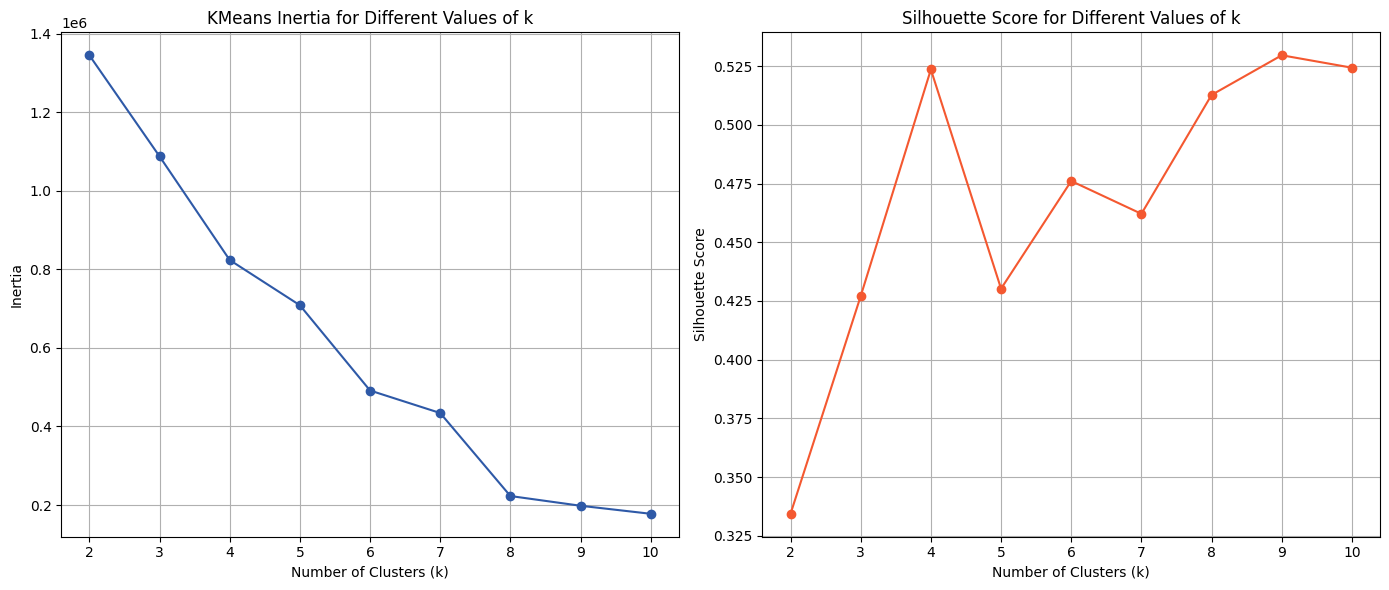

In [10]:
# Viz Elbow method and Silhouette
viz.elbow_silhouette_plot(k_values, inertia, silhouette_sc)

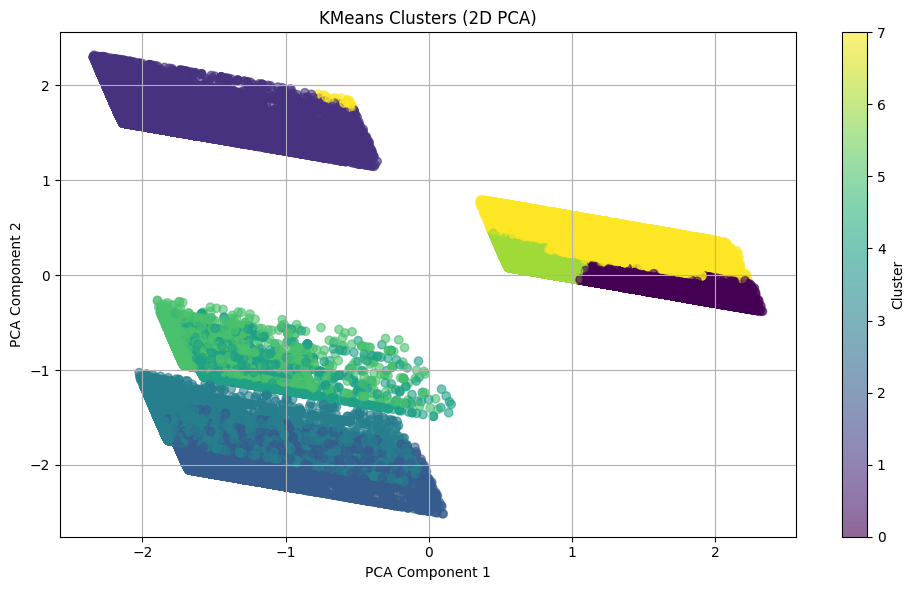

In [14]:
# Apply PCA (reduce to 2 components for visualization, or maybe 3–5 for modeling)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Run KMeans on PCA output
kmeans = KMeans(n_clusters=8, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 2D PCA plot
viz.kmeans_clusters_2D(X_pca, df['cluster'])

In [17]:
# Preparing for a 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

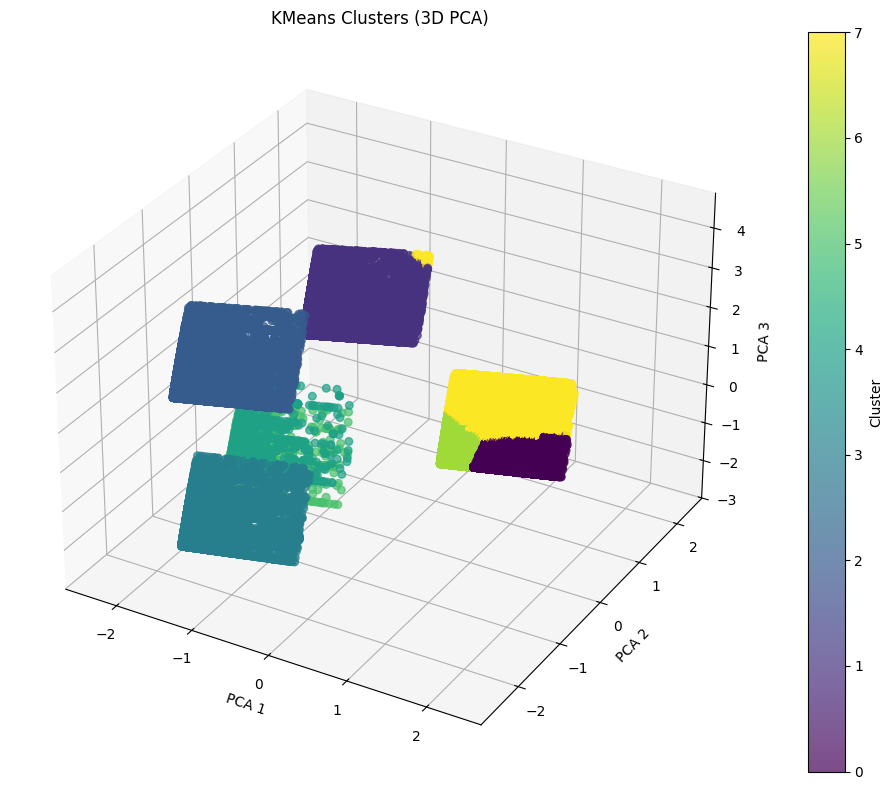

In [18]:
# 3D PCA plot
viz.means_clusters_3D(X_pca_3d, df['cluster'])

In [20]:
# Create a new dataframe with the relevant columns
cluster_df = df[['title',
                 'authors',
                 'all_texts',
                 'all_texts_processed',
                 'avg_score',
                 'sentiment_score',
                 'genre_Academic',
                 "genre_Children's/Young Adult",
                 'genre_Fiction',
                 'genre_Non-Fiction',
                 'genre_Poetry/Drama',
                 'genre_Unknown',
                 'cluster']]

In [21]:
# Check the new dataframe
cluster_df

,title,authors,all_texts,all_texts_processed,avg_score,sentiment_score,genre_Academic,genre_Children's/Young Adult,genre_Fiction,genre_Non-Fiction,genre_Poetry/Drama,genre_Unknown,cluster
0,Its Only Art If Its Well Hung!,['Julie Strain'],This is only for Julie Strain fans. It's a col...,nice collection julie strain image,4.00,0.3818,0,0,0,0,0,1,7
1,Dr. Seuss: American Icon,['Philip Nel'],I don't care much for Dr. Seuss but after read...,enjoy essential personal public library phlip ...,4.56,0.9806,1,0,0,0,0,0,2
2,Wonderful Worship in Smaller Churches,['David R. Ray'],"I just finished the book, &quot;Wonderful Wors...",outstanding resource small church pastor small...,5.00,0.9022,0,0,0,0,0,1,6
3,Whispers of the Wicked Saints,['Veronica Haddon'],I bought this book because I read some glowing...,good opinion buyer beware fall knee bravo vero...,3.72,0.9877,0,0,1,0,0,0,1
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],from publisher:Addresses the interplay of dive...,interplay tradition caribbean,5.00,0.0000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204319,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],This book was about a boy named Dominic who wa...,lcs review love orphan ellis island elvira woo...,4.69,0.9914,0,0,0,1,0,0,3
204320,Red Boots for Christmas,NaN,This beautifully illustrated children's book t...,wonderful way share miracle christ birth amazi...,5.00,0.9260,0,0,0,0,0,1,6
204321,Mamaw,['Wild Wild Cabbage'],A truly inspiring story of a woman I could onl...,incredible insightful writing mother love unfo...,4.67,0.8834,0,0,1,0,0,0,1
204322,The Autograph Man,['Zadie Smith'],After reading 50 pages and restarting every so...,fractured quest holy grail look spirituality w...,2.50,-0.5423,0,0,0,0,0,1,7


In [22]:
cluster_df.cluster.value_counts()

,count
cluster,
6,58339
7,36310
0,33096
1,32754
2,18857
3,18174
5,4219
4,2575


<h2 style="color: #75aadb;">06 | Cluster Analysis</h2>

### Plot analysis

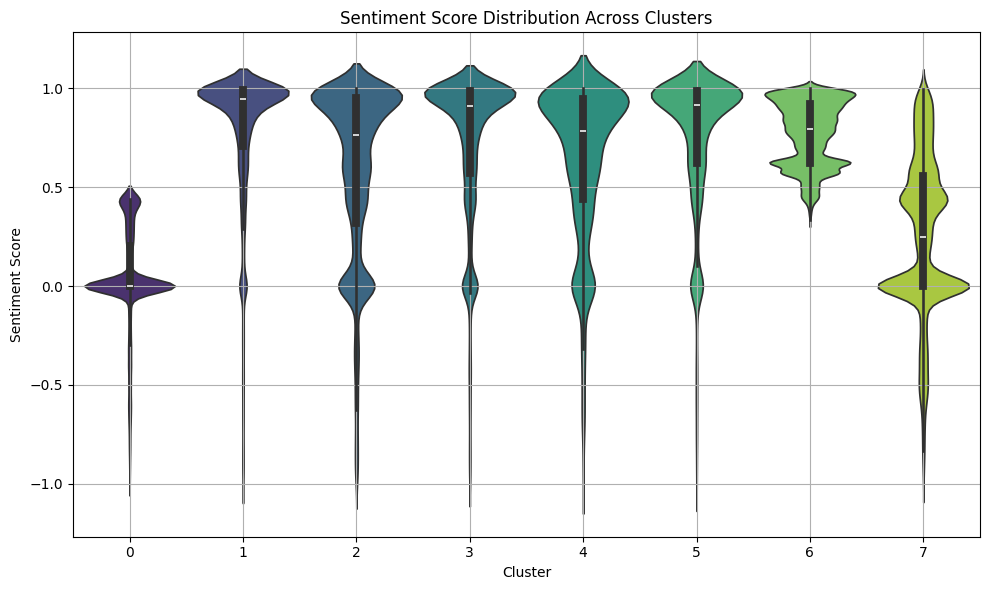

In [27]:
palette='viridis'
title='Sentiment Score Distribution Across Clusters'
ylabel='Sentiment Score'
# Plotting the violin plot for Sentiment Score
viz.violin_plot('cluster', 'sentiment_score', cluster_df, palette, title, ylabel)

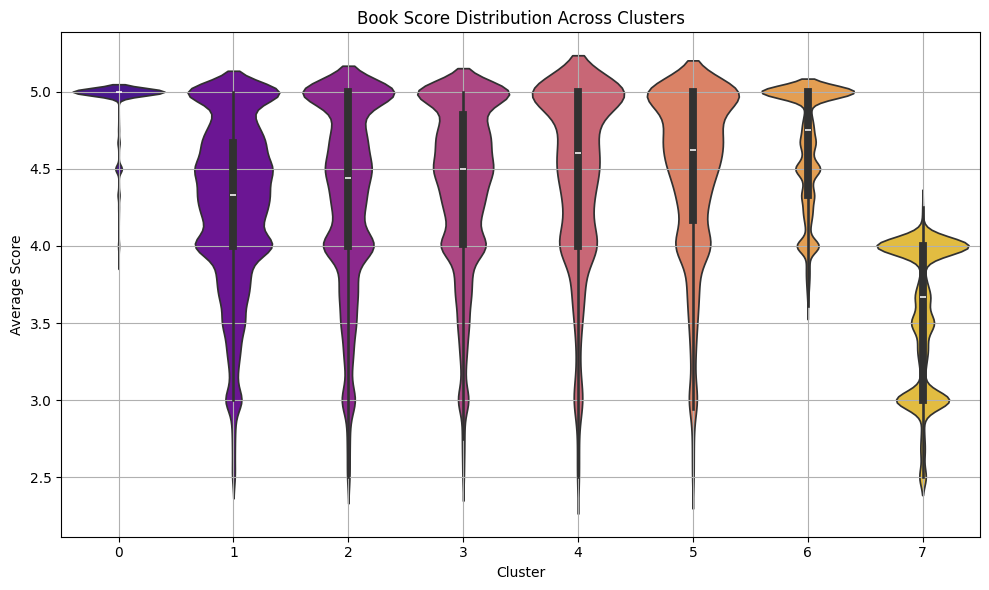

In [28]:
palette_s='plasma'
title_s='Book Score Distribution Across Clusters'
ylabel_s='Average Score'
# Plotting the violin plot for Score
viz.violin_plot('cluster', 'sentiment_score', cluster_df, palette, title, ylabel)

In [35]:
# Select cluster and genre columns
genre_columns = [col for col in df.columns if col.startswith('genre_')]
melted_df = df[['cluster'] + genre_columns].melt(id_vars='cluster', var_name='genre', value_name='present')

# Filter only where genre is present
melted_df = melted_df[melted_df['present'] == 1]
genre_cluster_matrix = melted_df.pivot_table(index='genre', columns='cluster', values='present', aggfunc='sum').fillna(0)

# Normalize the values
normalized_matrix = genre_cluster_matrix.div(genre_cluster_matrix.sum(axis=1), axis=0)

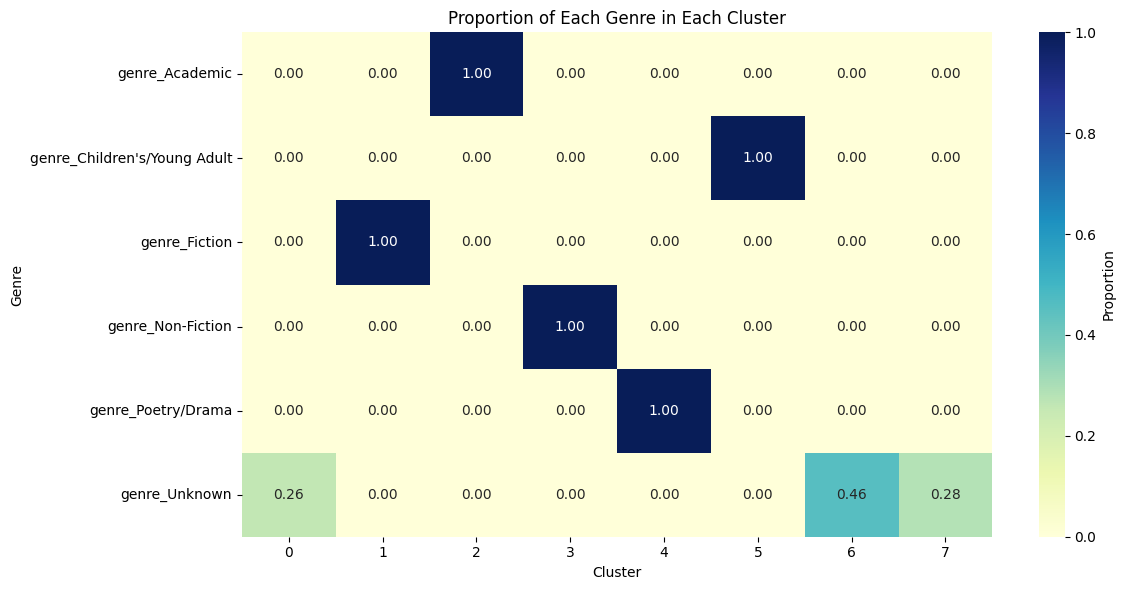

In [40]:
viz.heatmap_plot(normalized_matrix)

### Cluster Analysis:

*   **Cluster 0 or “Quiet Favorites"**: high rated books with a neutral sentiment. These could be academic, technical, or non-fiction books that are useful, informative, or well-written — but not triggering strong emotions in readers.

*   **Cluster 1 or Fiction**: strongly related to Fiction genre.

*   **Cluster 2 or Academic**: strongly related to Academic genre.

*   **Cluster 3 or Non-Fiction**: strongly related to Non-Fiction genre.

*   **Cluster 4 or Poetry/Drama**: strongly related to Poetry/Drama genre.

*   **Cluster 5 or Dhildren/YA**: strongly related to Children/Young Adult genre.

*   **Cluster 6 or "Emotional Favorites"**: books that people love and aren’t shy about it — possibly fiction, children’s books, or emotionally moving stories.

*   **Cluster 7 or Mediocre books**: low average score with low sentiment score. These books create divided opinions — people are unsure, mixed, or underwhelmed. Might include controversial topics, uneven quality, or books with hype but underdelivery.









### New dataframe labeled

In [41]:
cluster_labels = {
    0: 'Quiet Favorites',
    1: 'Fiction',
    2: 'Academic',
    3: 'Non-Fiction',
    4: 'Poetry/Drama',
    5: 'Children/YA',
    6: 'Emotional Favorites',
    7: 'Mediocre Books'
}

cluster_df['cluster_label'] = cluster_df['cluster'].map(cluster_labels)

In [42]:
cluster_df

,title,authors,all_texts,all_texts_processed,avg_score,sentiment_score,genre_Academic,genre_Children's/Young Adult,genre_Fiction,genre_Non-Fiction,genre_Poetry/Drama,genre_Unknown,cluster,cluster_label
0,Its Only Art If Its Well Hung!,['Julie Strain'],This is only for Julie Strain fans. It's a col...,nice collection julie strain image,4.00,0.3818,0,0,0,0,0,1,7,Mediocre Books
1,Dr. Seuss: American Icon,['Philip Nel'],I don't care much for Dr. Seuss but after read...,enjoy essential personal public library phlip ...,4.56,0.9806,1,0,0,0,0,0,2,Academic
2,Wonderful Worship in Smaller Churches,['David R. Ray'],"I just finished the book, &quot;Wonderful Wors...",outstanding resource small church pastor small...,5.00,0.9022,0,0,0,0,0,1,6,Emotional Favorites
3,Whispers of the Wicked Saints,['Veronica Haddon'],I bought this book because I read some glowing...,good opinion buyer beware fall knee bravo vero...,3.72,0.9877,0,0,1,0,0,0,1,Fiction
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],from publisher:Addresses the interplay of dive...,interplay tradition caribbean,5.00,0.0000,0,0,0,0,0,1,0,Quiet Favorites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204319,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],This book was about a boy named Dominic who wa...,lcs review love orphan ellis island elvira woo...,4.69,0.9914,0,0,0,1,0,0,3,Non-Fiction
204320,Red Boots for Christmas,NaN,This beautifully illustrated children's book t...,wonderful way share miracle christ birth amazi...,5.00,0.9260,0,0,0,0,0,1,6,Emotional Favorites
204321,Mamaw,['Wild Wild Cabbage'],A truly inspiring story of a woman I could onl...,incredible insightful writing mother love unfo...,4.67,0.8834,0,0,1,0,0,0,1,Fiction
204322,The Autograph Man,['Zadie Smith'],After reading 50 pages and restarting every so...,fractured quest holy grail look spirituality w...,2.50,-0.5423,0,0,0,0,0,1,7,Mediocre Books


In [45]:
# Save the cluster dataset
cluster_df.to_csv('../datasets/cluster_dataset.csv', index=False)